In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("vehicle loan/train.csv")
test_df = pd.read_csv("vehicle loan/test.csv")



In [3]:
train_df.head()


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train_df.shape


(233154, 41)

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
train_df.columns


Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [8]:
train_df.describe()


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [9]:
train_df.isnull().sum()


UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

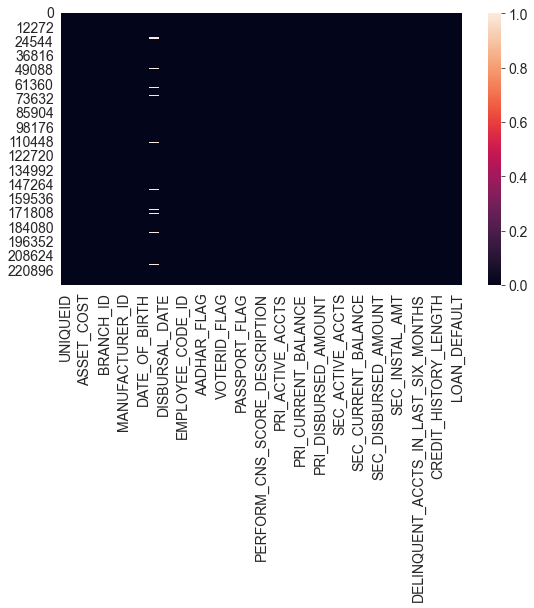

In [10]:
sns.heatmap(train_df.isnull())
plt.show()

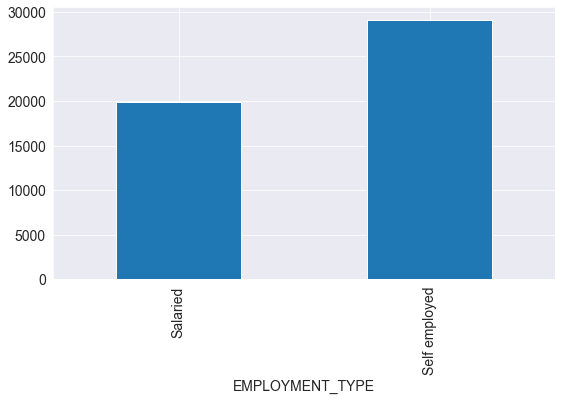

In [11]:
train_df.groupby('EMPLOYMENT_TYPE')['LOAN_DEFAULT'].sum().plot.bar()
plt.show()


In [12]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
print(f"Total length: {len(numerical_features)}")


Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')
Total length: 35


In [13]:
train_df[numerical_features].head()


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,...,0,0,0,0,1991,0,0,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,...,0,0,0,0,31,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,0,0,0,0,0,0,0,0,1,1


In [14]:
discrete_variables = [feature for feature in numerical_features if len(train_df[feature].unique())<25]
print(discrete_variables)
print("Discrete Variables Count: {}".format(len(discrete_variables)))


['MANUFACTURER_ID', 'STATE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PRI_OVERDUE_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'LOAN_DEFAULT']
Discrete Variables Count: 13


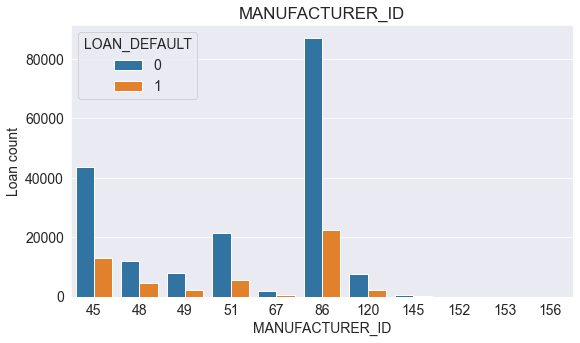

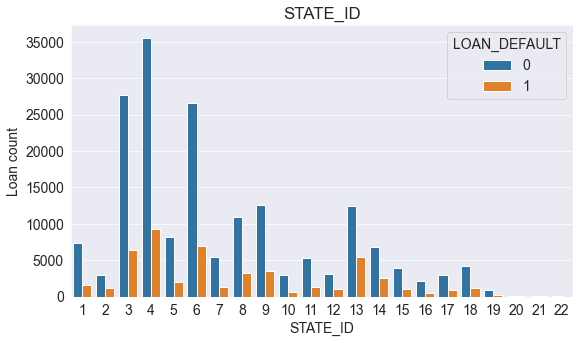

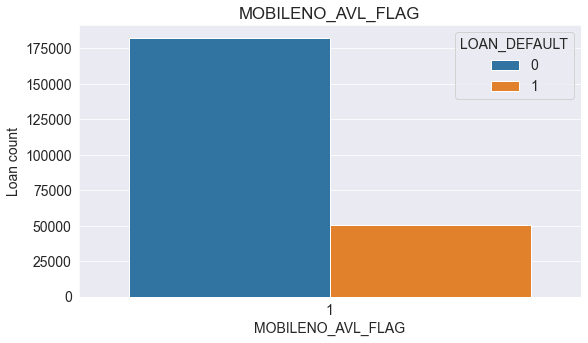

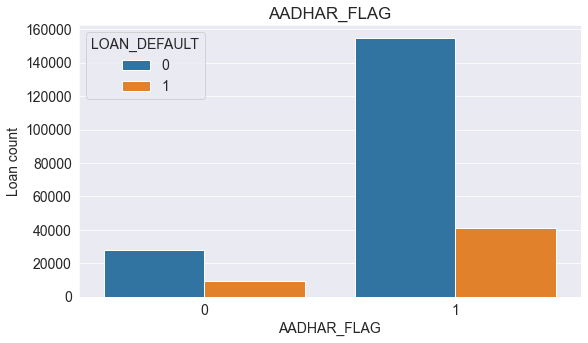

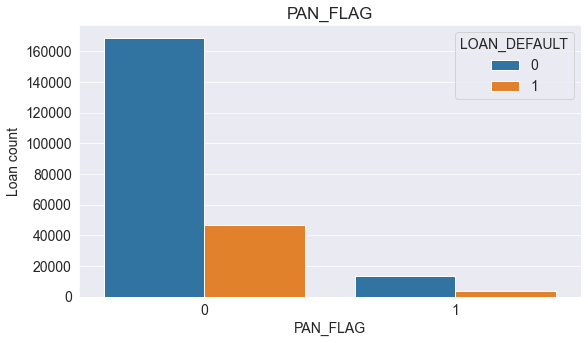

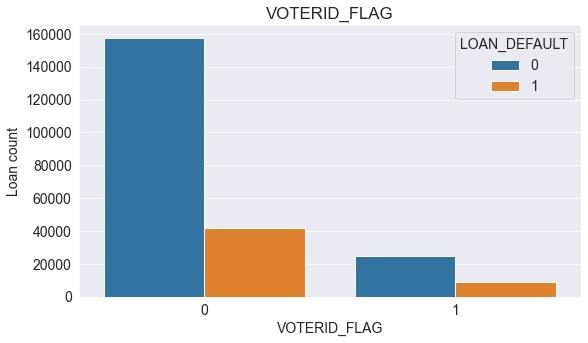

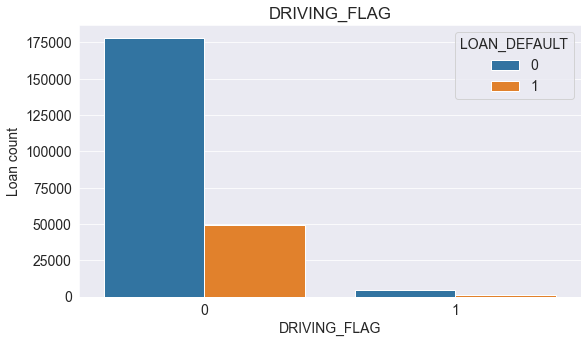

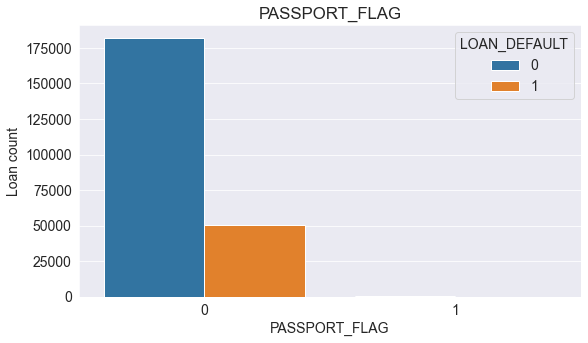

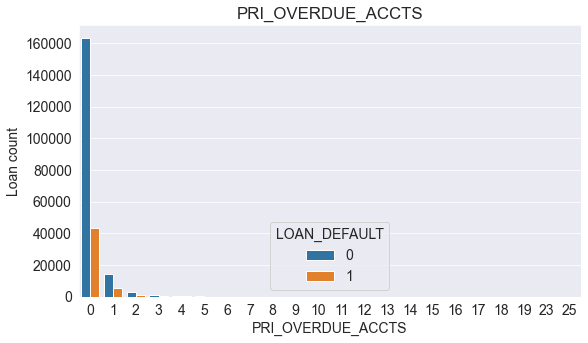

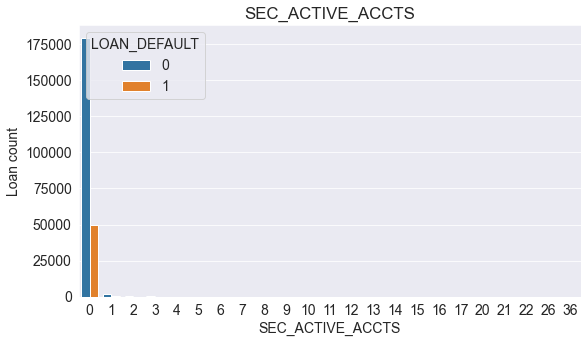

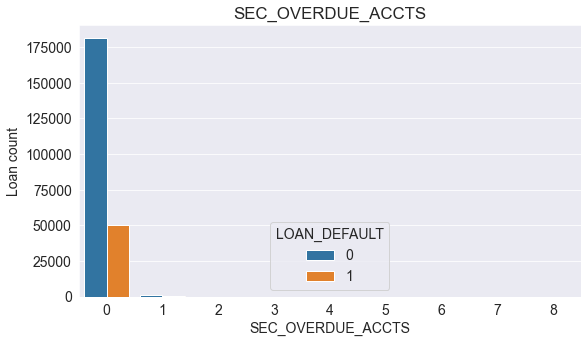

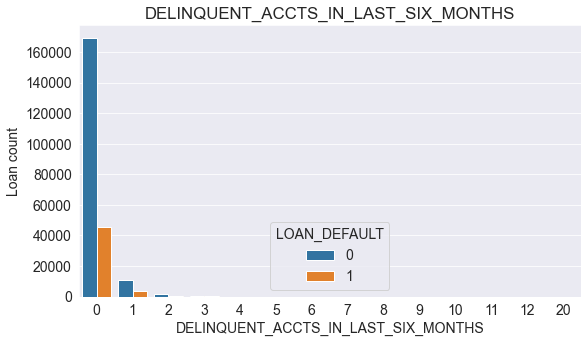

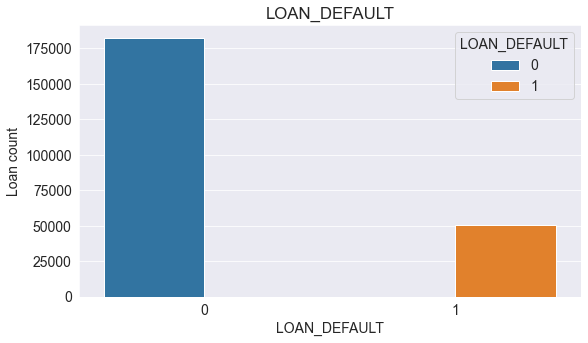

In [15]:
for feature in discrete_variables:
    data = train_df.copy()
    sns.countplot(data=data, x=feature, hue='LOAN_DEFAULT')
    plt.xlabel(feature)
    plt.ylabel('Loan count')
    plt.title(feature)
    plt.show()


In [16]:
train_df['PRI_OVERDUE_ACCTS'].value_counts()


0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
14         5
13         5
18         2
17         2
23         1
19         1
15         1
16         1
25         1
Name: PRI_OVERDUE_ACCTS, dtype: int64

In [17]:
to_drop = ['UNIQUEID','MANUFACTURER_ID', 'STATE_ID', 'PASSPORT_FLAG','MOBILENO_AVL_FLAG', 'DRIVING_FLAG']
train_df = train_df.drop(to_drop, axis=1)


In [18]:
train_df.head()


,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,EMPLOYEE_CODE_ID,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,67,22807,1441,01-01-1984,Salaried,03-08-2018,1998,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,67,22807,1502,31-07-1985,Self employed,26-09-2018,1998,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,67,22807,1497,24-08-1985,Self employed,01-08-2018,1998,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,67,22807,1501,30-12-1993,Self employed,26-10-2018,1998,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,67,22807,1495,09-12-1977,Self employed,26-09-2018,1998,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [19]:
continuous_variables = [feature for feature in numerical_features if feature not in discrete_variables+['UNIQUEID']]
print(continuous_variables)
print("Continuous variables Count: {}".format(len(continuous_variables)))


['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES']
Continuous variables Count: 21


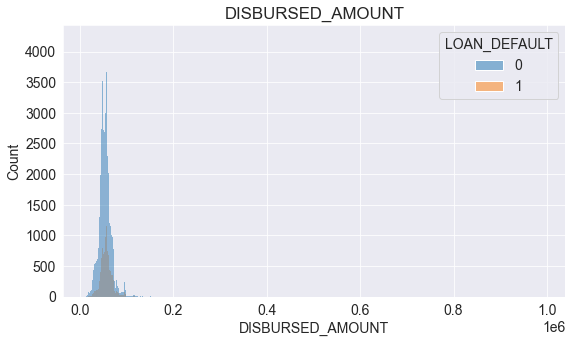

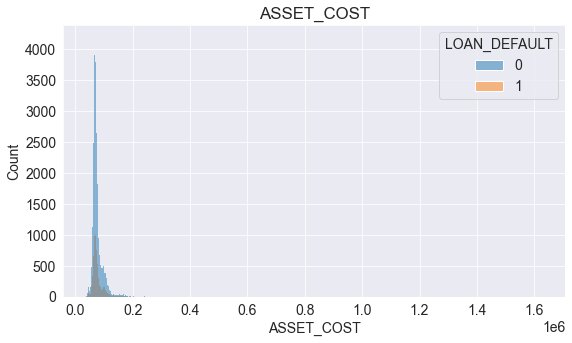

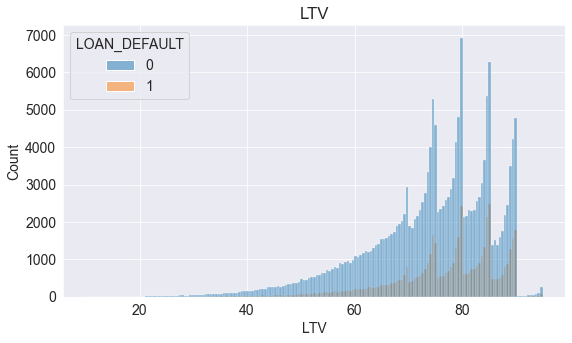

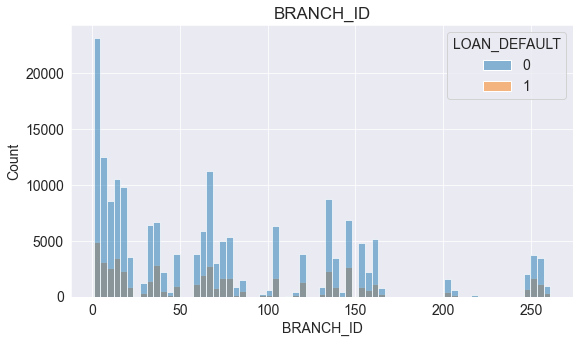

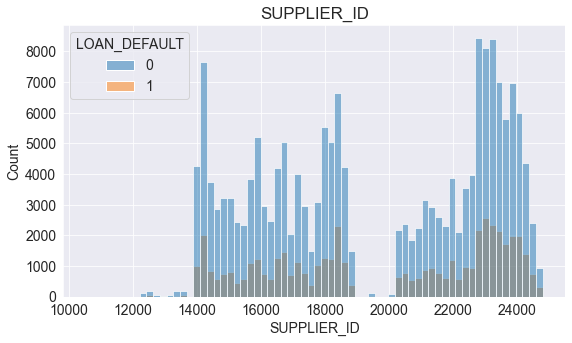

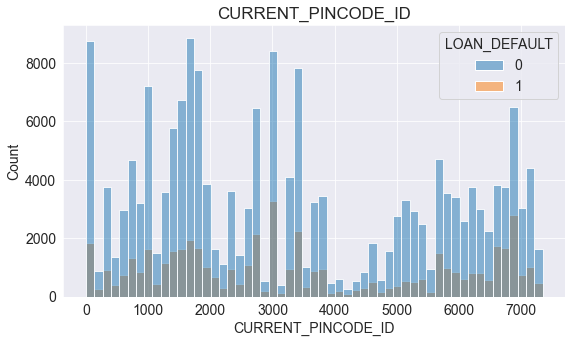

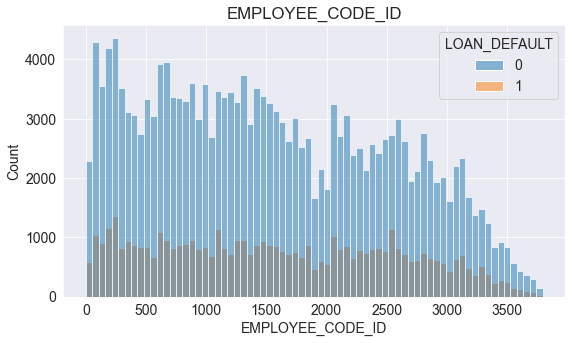

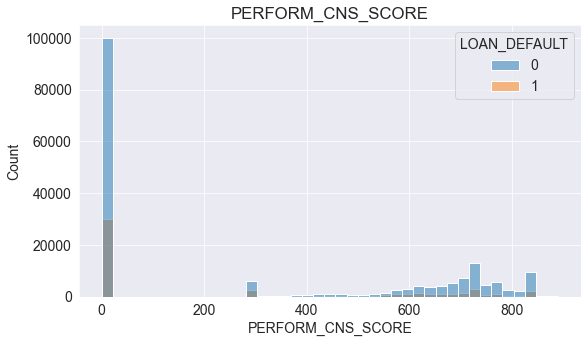

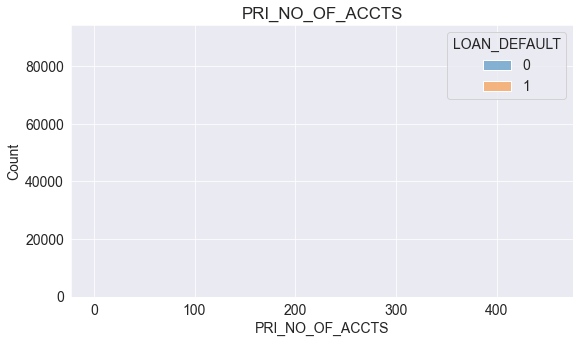

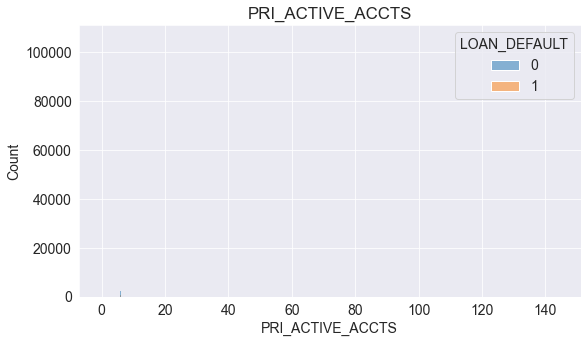

In [20]:
for feature in continuous_variables[:10]:
    data = train_df.copy()
    #data[feature].hist(bins=25)
    sns.histplot(data=data, x=feature, hue='LOAN_DEFAULT')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

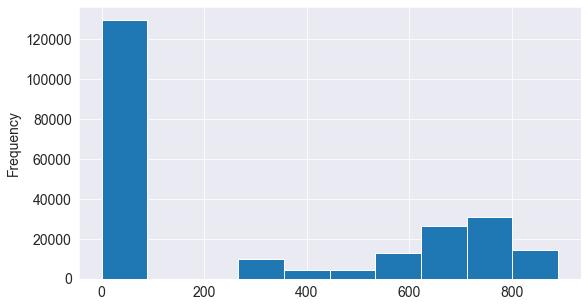

In [21]:
train_df['PERFORM_CNS_SCORE'].plot(kind='hist')
plt.show()


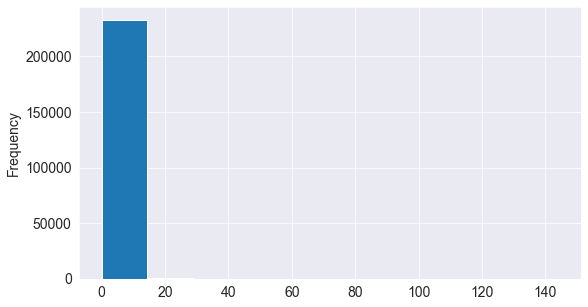

In [22]:
train_df['PRI_ACTIVE_ACCTS'].plot(kind='hist')
plt.show()


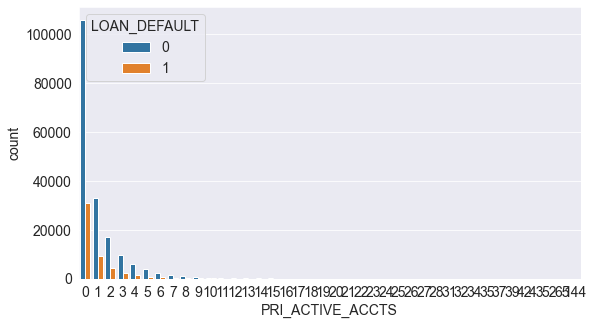

In [23]:
sns.countplot(data=train_df, x=train_df['PRI_ACTIVE_ACCTS'], hue='LOAN_DEFAULT')
plt.show()


In [24]:
to_drop = ['BRANCH_ID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID']
train_df = train_df.drop(to_drop, axis=1)


In [25]:
train_df.columns


Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT'],
      dtype='object')

In [26]:
train_df['no_of_accts'] = train_df['PRI_NO_OF_ACCTS'] + train_df['SEC_NO_OF_ACCTS']
train_df['active_accts'] = train_df['PRI_ACTIVE_ACCTS'] + train_df['SEC_ACTIVE_ACCTS']
train_df['overdue_accts'] = train_df['PRI_OVERDUE_ACCTS'] + train_df['SEC_OVERDUE_ACCTS']
train_df['outstanding_amount'] = train_df['PRI_CURRENT_BALANCE'] + train_df['SEC_CURRENT_BALANCE']
train_df['sanctioned_amount'] = train_df['PRI_SANCTIONED_AMOUNT'] + train_df['SEC_SANCTIONED_AMOUNT']
train_df['disbursed_amount'] = train_df['PRI_DISBURSED_AMOUNT'] + train_df['SEC_DISBURSED_AMOUNT']
train_df['install_amt'] = train_df['PRIMARY_INSTAL_AMT'] + train_df['SEC_INSTAL_AMT']


In [27]:
train_df.drop(['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','SEC_DISBURSED_AMOUNT',
               'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','SEC_CURRENT_BALANCE',
             'PRI_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_SANCTIONED_AMOUNT',
             'SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS',
              'SEC_INSTAL_AMT'], axis=1, inplace=True)


In [28]:
train_df.head()


,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,...,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,no_of_accts,active_accts,overdue_accts,outstanding_amount,sanctioned_amount,disbursed_amount,install_amt
0,50578,58400,89.55,01-01-1984,Salaried,03-08-2018,1,0,0,0,...,0yrs 0mon,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,31-07-1985,Self employed,26-09-2018,1,0,0,598,...,1yrs 11mon,0,1,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63,24-08-1985,Self employed,01-08-2018,1,0,0,0,...,0yrs 0mon,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30-12-1993,Self employed,26-10-2018,1,0,0,305,...,1yrs 3mon,1,1,3,0,0,0,0,0,31
4,52378,60300,88.39,09-12-1977,Self employed,26-09-2018,1,0,0,0,...,0yrs 0mon,1,1,0,0,0,0,0,0,0


In [29]:
categorical_features = train_df.select_dtypes(include=['object']).columns
print(categorical_features)
print("Categorical features Count: {}".format(len(categorical_features)))


Index(['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH'],
      dtype='object')
Categorical features Count: 6


In [30]:
train_df[categorical_features].head()


,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,01-01-1984,Salaried,03-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-1985,Self employed,26-09-2018,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-1985,Self employed,01-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-1993,Self employed,26-10-2018,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-1977,Self employed,26-09-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [31]:
train_df.columns


Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'no_of_accts', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'disbursed_amount',
       'install_amt'],
      dtype='object')

In [32]:
# convert dateofBirth and Disbursal date to datetime object
train_df['DISBURSAL_DATE'] = pd.to_datetime(train_df['DISBURSAL_DATE'])
train_df['DISBURSAL_DATE'].head()


0   2018-03-08
1   2018-09-26
2   2018-01-08
3   2018-10-26
4   2018-09-26
Name: DISBURSAL_DATE, dtype: datetime64[ns]

In [33]:
train_df['DATE_OF_BIRTH'] = pd.to_datetime(train_df['DATE_OF_BIRTH'])
train_df['DATE_OF_BIRTH'].head()

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-09-12
Name: DATE_OF_BIRTH, dtype: datetime64[ns]

In [34]:
train_df['AVERAGE_ACCT_AGE'].value_counts()


0yrs 0mon      119373
0yrs 6mon        6028
0yrs 7mon        5366
0yrs 11mon       5237
0yrs 10mon       5143
                ...  
24yrs 4mon          1
15yrs 11mon         1
15yrs 2mon          1
18yrs 11mon         1
15yrs 8mon          1
Name: AVERAGE_ACCT_AGE, Length: 192, dtype: int64

In [35]:
import re
def to_yrs(s):
    nos = re.findall(r'(\d+)', string=s)
    yr = int(nos[0])
    mo = int(nos[1])
    return (yr * 12) + mo

In [36]:
train_df['AVERAGE_ACCT_AGE'] = train_df['AVERAGE_ACCT_AGE'].apply(lambda x: to_yrs(x))
train_df['CREDIT_HISTORY_LENGTH'] = train_df['CREDIT_HISTORY_LENGTH'].apply(lambda x: to_yrs(x))


In [37]:
train_df['EMPLOYMENT_TYPE'] = train_df['EMPLOYMENT_TYPE'].replace(np.nan, 'Self employed')


In [38]:
train_df[categorical_features].head()


,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,1984-01-01,Salaried,2018-03-08,No Bureau History Available,0,0
1,1985-07-31,Self employed,2018-09-26,I-Medium Risk,23,23
2,1985-08-24,Self employed,2018-01-08,No Bureau History Available,0,0
3,1993-12-30,Self employed,2018-10-26,L-Very High Risk,8,15
4,1977-09-12,Self employed,2018-09-26,No Bureau History Available,0,0


In [39]:
train_df['Age'] = (train_df['DISBURSAL_DATE'] - train_df['DATE_OF_BIRTH']) / np.timedelta64(1, 'Y')


In [40]:
train_df = train_df.drop(['DATE_OF_BIRTH', 'DISBURSAL_DATE'], axis=1)


In [41]:
train_df.select_dtypes(include=['object']).columns


Index(['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION'], dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [43]:
train_df['is_salaried'] = pd.get_dummies(data=train_df['EMPLOYMENT_TYPE'])['Salaried']
train_df = train_df.drop(['EMPLOYMENT_TYPE'], axis=1)


In [44]:
train_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()


No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [45]:
risk = []
for i in train_df['PERFORM_CNS_SCORE_DESCRIPTION']:
    if('Very Low' in i):
        risk.append('Very Low Risk')
    elif('Low' in i):
        risk.append('Low Risk')
    elif('Medium' in i):
        risk.append('Medium Risk')
    elif('Very High' in i):
        risk.append('Very High Risk')
    elif('High' in i):
        risk.append('High Risk')
    else:
        risk.append('Not Scored')


In [46]:
train_df["risk"] = risk
train_df.head()


,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,...,no_of_accts,active_accts,overdue_accts,outstanding_amount,sanctioned_amount,disbursed_amount,install_amt,Age,is_salaried,risk
0,50578,58400,89.55,1,0,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,34.182769,1,Not Scored
1,47145,65550,73.23,1,0,0,598,I-Medium Risk,0,1,...,1,1,1,27600,50200,50200,1991,33.156054,0,Medium Risk
2,53278,61360,89.63,1,0,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,32.375750,0,Not Scored
3,57513,66113,88.48,1,0,0,305,L-Very High Risk,0,0,...,3,0,0,0,0,0,31,24.821865,0,Very High Risk
4,52378,60300,88.39,1,0,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0,41.038488,0,Not Scored


In [47]:
risk_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

train_df['risk'] = train_df['risk'].map(risk_map)


In [48]:
train_df.drop('PERFORM_CNS_SCORE_DESCRIPTION',axis=1,inplace=True)


In [52]:
numerical_ft = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PERFORM_CNS_SCORE', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS',
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH',
                'NO_OF_INQUIRIES', 'no_of_accts', 'active_accts', 'overdue_accts', 'outstanding_amount', 'sanctioned_amount', 'install_amt', 
                 'Age', 'risk']
#numerical_ft = list(numerical_ft)
#numerical_ft.remove('loan_default')
print(numerical_ft)


['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PERFORM_CNS_SCORE', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'no_of_accts', 'active_accts', 'overdue_accts', 'outstanding_amount', 'sanctioned_amount', 'install_amt', 'Age', 'risk']


In [53]:
train_df.head()


,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,...,no_of_accts,active_accts,overdue_accts,outstanding_amount,sanctioned_amount,disbursed_amount,install_amt,Age,is_salaried,risk
0,50578,58400,89.55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34.182769,1,-1
1,47145,65550,73.23,1,0,0,598,0,1,23,...,1,1,1,27600,50200,50200,1991,33.156054,0,2
2,53278,61360,89.63,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32.375750,0,-1
3,57513,66113,88.48,1,0,0,305,0,0,8,...,3,0,0,0,0,0,31,24.821865,0,0
4,52378,60300,88.39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.038488,0,-1


In [54]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(train_df[numerical_ft], train_df['LOAN_DEFAULT'])


ExtraTreesClassifier()

In [55]:
train_df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'PERFORM_CNS_SCORE', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'no_of_accts', 'active_accts', 'overdue_accts', 'outstanding_amount',
       'sanctioned_amount', 'disbursed_amount', 'install_amt', 'Age',
       'is_salaried', 'risk'],
      dtype='object')

In [56]:
feat_imp = pd.DataFrame(model.feature_importances_, index=numerical_ft, columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False)


In [57]:
feat_imp.head()


,Feature_Importances
Age,0.174857
LTV,0.173940
ASSET_COST,0.167090
DISBURSED_AMOUNT,0.162761
CREDIT_HISTORY_LENGTH,0.036287


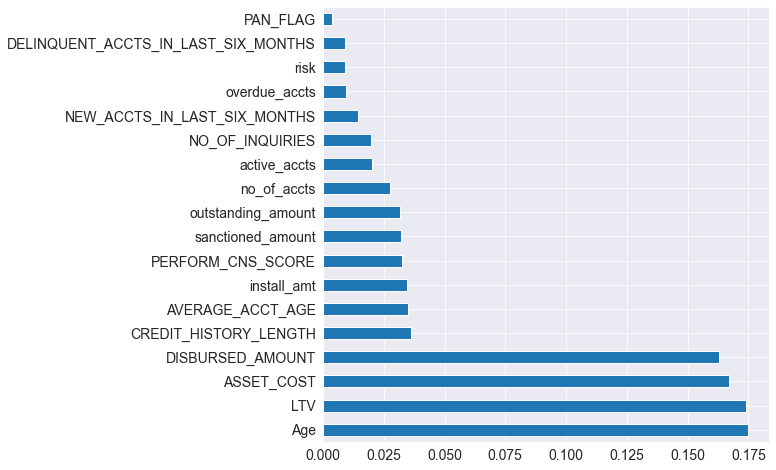

In [58]:
plt.figure(figsize=(8,8))
ranked_features = pd.Series(model.feature_importances_,index=numerical_ft)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [59]:
y = train_df['LOAN_DEFAULT']
X = train_df.drop('LOAN_DEFAULT',axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xscaled = sc.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled,columns=X.columns)


In [63]:
!pip install statsmodels==0.12.2


In [64]:
import statsmodels.api as sm
Xc = sm.add_constant(Xscaled)
model = sm.Logit(y, Xc).fit()
model.summary()


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.506793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           LOAN_DEFAULT   No. Observations:               233154
Model:                          Logit   Df Residuals:                   233131
Method:                           MLE   Df Model:                           22
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                 0.03131
Time:                        19:16:04   Log-Likelihood:            -1.1816e+05
converged:                       True   LL-Null:                   -1.2198e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3449      0.005   -253.280      0.000      -1.355      -1.334
DISBURSED_AMOUNT                       -0.0804      0.029     -2.754      0.006      -0.138      -0.023
ASSET_COST                              0.1894      0.029      6.577      0.000       0.133       0.246
LTV                                     0.3960      0.021     19.314      0.000       0.356       0.436
AADHAR_FLAG                            -0.0530      0.010     -5.187      0.000      -0.073      -0.033
PAN_FLAG                               -0.0088      0.005     -1.684      0.092      -0.019       0.001
VOTERID_FLAG                            0.0630      0.010      6.237      0.000       0.043       0.083
PERFORM_CNS_SCORE                       0.6603      0.036     18.391      0.000       0.590       0.731
NEW_ACCTS_IN_LAST_SIX_MONTHS            0.0060      0.009      0.678      0.498      -0.011       0.023
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS     0.0836      0.006     14.092      0.000       0.072       0.095
AVERAGE_ACCT_AGE                        0.0931      0.011      8.298      0.000       0.071       0.115
CREDIT_HISTORY_LENGTH                  -0.1888      0.014    -13.951      0.000      -0.215      -0.162
NO_OF_INQUIRIES                         0.1052      0.005     21.364      0.000       0.096       0.115
no_of_accts                            -0.0305      0.010     -3.114      0.002      -0.050      -0.011
active_accts                           -0.1115      0.013     -8.542      0.000      -0.137      -0.086
overdue_accts                           0.1025      0.007     15.478      0.000       0.090       0.116
outstanding_amount                     -0.0938      0.010     -9.068      0.000      -0.114      -0.074
sanctioned_amount                      -0.1051      0.181     -0.580      0.562      -0.460       0.250
disbursed_amount                        0.1134      0.182      0.624      0.532      -0.243       0.469
install_amt                             0.0023      0.007      0.348      0.728      -0.011       0.015
Age                                    -0.0791      0.005    -14.493      0.000      -0.090      -0.068
is_salaried                            -0.0824      0.005    -15.778      0.000      -0.093      -0.072
risk                                   -0.7592      0.035    -21.752      0.000      -0.828      -0.691
=======================================================================================================
"""

In [65]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score


In [66]:
y_pred = model.predict(Xc)
prob = pd.DataFrame(y_pred, columns=['probability'])
prob['LOAN_DEFAULT'] = y
prob['y_est'] = prob['probability'].apply(lambda x: 0 if x<0.5 else 1)
prob.head()

,probability,LOAN_DEFAULT,y_est
0,0.264722,0,0
1,0.289286,1,0
2,0.304823,0,0
3,0.386323,1,0
4,0.311519,1,0


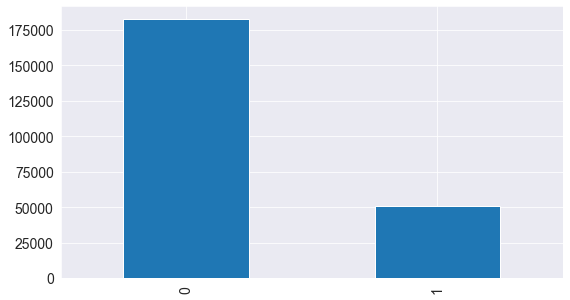

In [62]:
train_df['LOAN_DEFAULT'].value_counts().plot(kind='bar')
plt.show()


In [67]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)


In [61]:
!pip install imblearn --quiet


In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
print(X_train_sm.shape, y_train_sm.shape)


(255748, 22) (255748,)


In [70]:
!pip install xgboost --quiet


In [71]:
import xgboost
from xgboost import XGBClassifier

rsearch_best_params = {'eval_metric': 'auc',
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 9,
 'n_estimators': 192,
 'reg_alpha': 0.1}


In [72]:
xgbc = XGBClassifier(**rsearch_best_params, random_state=300)
xgbc.fit(X_train_sm, y_train_sm)


C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=192, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=300,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_train_pred = xgbc.predict(X_train_sm)
y_test_pred = xgbc.predict(X_test)
y_train_prob = xgbc.predict_proba(X_train_sm)
y_test_prob = xgbc.predict_proba(X_test)

In [75]:
accuracy_score(y_train_sm,y_train_pred)

0.8293710996762438

In [77]:
print('Train AUC score:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('Test AUC score:',roc_auc_score(y_test,y_test_prob[:,1]))

Train AUC score: 0.9195263495502177
Test AUC score: 0.5980354658695698


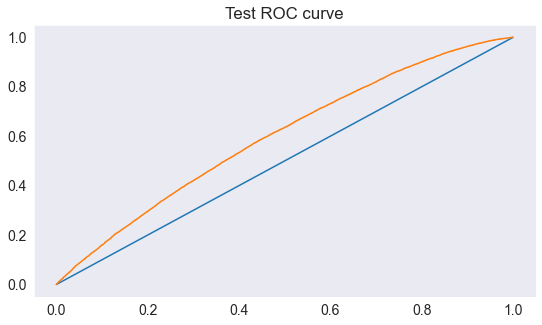

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()


In [79]:
confusion_matrix(y_test,y_test_pred)


array([[43732, 10937],
       [10758,  4520]], dtype=int64)

In [80]:
accuracy_score(y_test,y_test_pred)

0.6898365905614251

In [81]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))


Test Classification Report

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     54669
           1       0.29      0.30      0.29     15278

    accuracy                           0.69     69947
   macro avg       0.55      0.55      0.55     69947
weighted avg       0.69      0.69      0.69     69947

